### Compare generated GP models with literature models

In [4]:
from caat import SNModel
from caat.utils import ROOT_DIR, WLE
import os
import pickle as pkl
import matplotlib.pyplot as plt

In [5]:
# Load Khakpash+24 model grid
with open(os.path.join(ROOT_DIR, "data", "comparison_models", "Khakpash24", "all_templates.pkl"), 'rb') as f:
    u = pkl._Unpickler(f)
    u.encoding = 'latin1'
    tmpl = u.load()

# Generate multi-D GP model
snmodel = SNModel(
    surface="SESNe_SNIIb_GP_model.fits"
)

bands_to_plot = ["w1", "U", "B", "V", "g", "rp", "ip"]
sntype = "IIb"

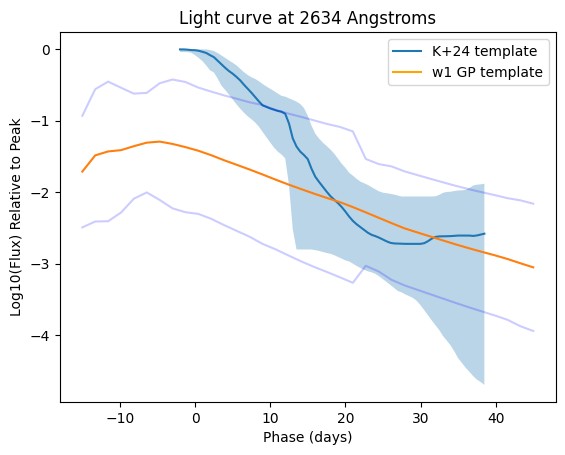

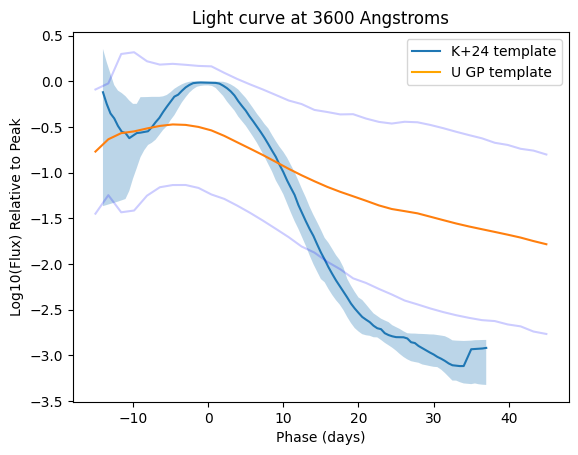

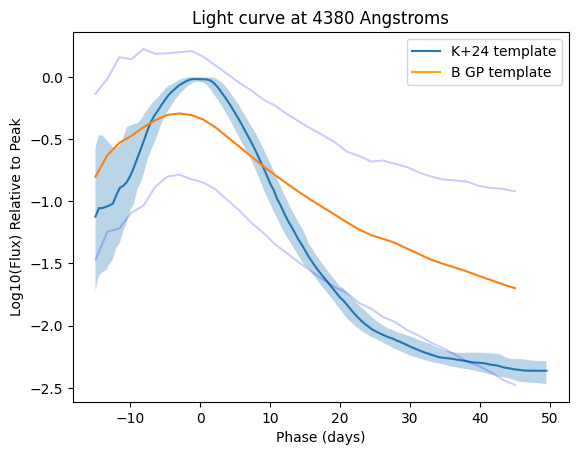

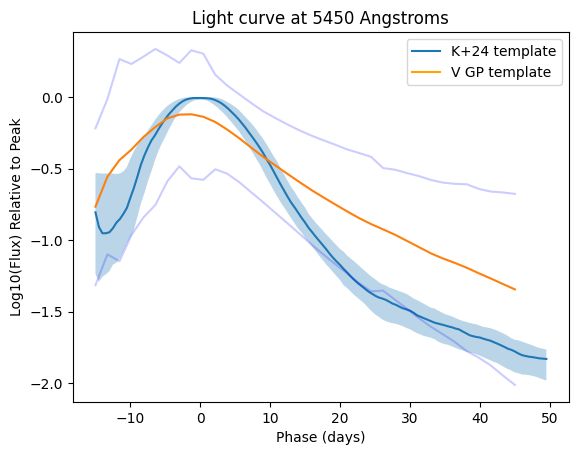

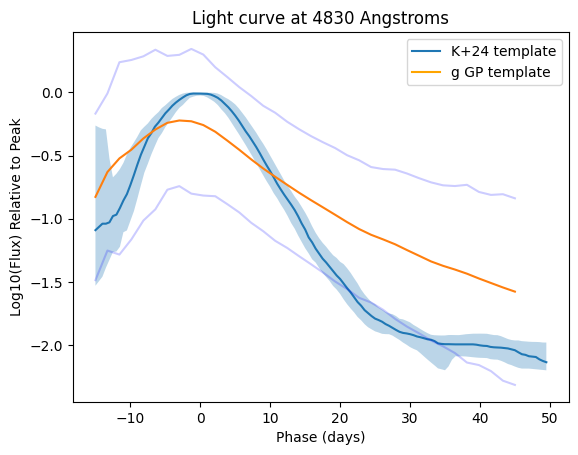

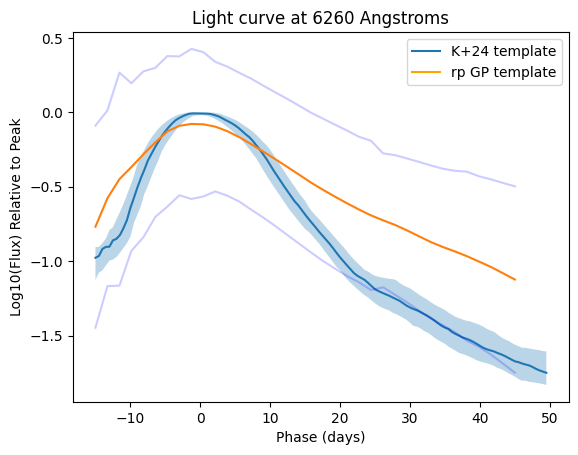

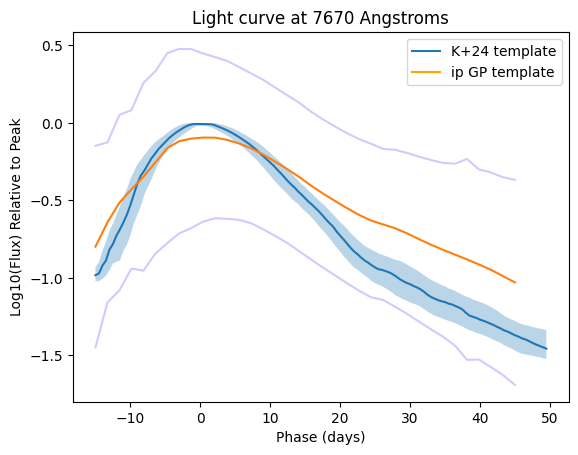

In [6]:
for band in bands_to_plot:
    _, ax = plt.subplots()
    ax.plot(tmpl[band][sntype]['t'], tmpl[band][sntype]['rollingMedian'], label="K+24 template")
    ax.fill_between(
        tmpl[band][sntype]['t'],
        tmpl[band][sntype]['rollingPc25'],
        tmpl[band][sntype]['rollingPc75'],
        alpha=0.3,
    )

    if band in ["w2", "m2", "w1"]:
        caat_band = "UV" + band.upper()
    else:
        caat_band = band[0]
    snmodel.predict_lightcurve(-15.0, 45.0, WLE[caat_band], show=False)
    plt.plot([], [], color='orange', label=f"{band} GP template")
    plt.legend()
    plt.show()